# Monte Carlo Simulation

Currently using a normal distribution.
Next steps: modify distribution to random distribution between limits, or triangular. 
    Also, check with experts the boundaries guestimates.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import numpy as np

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

In [4]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

### Start PV_ICE baseline

In [ ]:
import PV_ICE

In [2]:
MATERIAL = 'glass'
SANITYCHECK = False

if SANITYCHECK:
    MODULEBASELINE = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\tests\baseline_module_test_2.csv'
    MATERIALBASELINE = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\tests\baseline_material_test_2.csv'
else:
    MODULEBASELINE = r'..\baselines\baseline_modules_US.csv'
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIAL+'.csv'

In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='baseline', file=MODULEBASELINE)
r1.scenario['baseline'].addMaterial(MATERIAL, file=MATERIALBASELINE)



path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Montecarlo Parameters

In [14]:
avg = 1
std_dev = .1
num_reps = len(r1.scenario['baseline'].data['mod_MFG_eff'])   # So each row gets a new value
num_simulations = 500


### Variables that are  being MonteCarlo-ed

In [15]:
stages_mod = ['mod_eff', 'mod_degradation', 'mod_MFG_eff', 'mod_EOL_collection_eff',
          'mod_EOL_collected_recycled']

stages_mat = ['mat_massperm2', 'mat_MFG_eff', 'mat_MFG_scrap_Recycled', 
          'mat_MFG_scrap_Recycled_into_HQ', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
          'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff', 'mat_EOL_Recycled_into_HQ',
          'mat_EOL_RecycledHQ_Reused4MFG']

### Creating the Multiple Monte Carlo Scenarios

In [16]:
for i in range (0, num_simulations):
    simname = 'mod_'+str(i)
    r1.createScenario(name=simname, file=MODULEBASELINE)
    r1.scenario[simname].addMaterial(MATERIAL, file=MATERIALBASELINE)

    for jj in range (0, len(stages_mod)):
        r1.scenario[simname].data[stages_mod[jj]]=r1.scenario[simname].data[stages_mod[jj]]*np.random.normal(avg, std_dev, num_reps).round(2)
        r1.scenario[simname].data[stages_mod[jj]].clip(lower=0.0, upper=100.0, inplace=True)
        
    for jj in range (0, len(stages_mat)):
        r1.scenario[simname].material[MATERIAL].materialdata[stages_mat[jj]]=r1.scenario[simname].material[MATERIAL].materialdata[stages_mat[jj]]*np.random.normal(avg, std_dev, num_reps).round(2)
        r1.scenario[simname].material[MATERIAL].materialdata[stages_mat[jj]].clip(lower=0.0, upper=100.0, inplace=True)

##### Visual Check of changes

In [18]:
r1.scenario['baseline'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
0,1995,12.500000,12.50,15.0,20.0,0.55,10.0,90.0,15.0,40.0,0.0,0.0
1,1996,9.667667,12.70,15.0,20.0,0.55,10.0,90.0,15.0,40.0,0.0,0.0
2,1997,11.622000,12.88,19.0,23.0,0.55,15.0,90.0,15.0,40.0,0.0,0.0
3,1998,11.781000,13.06,19.0,23.0,0.55,15.0,90.0,15.0,40.0,0.0,0.0
4,1999,16.884667,13.24,19.0,23.0,0.55,15.0,90.0,15.0,40.0,0.0,0.0


In [59]:
r1.scenario['mod_0'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_50,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,1995,12.500000,12.8750,15.0,20.0,0.4895,10.0,98.1,12.75,36.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1996,9.667667,12.3190,15.0,20.0,0.5225,10.0,83.7,14.55,44.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.121011,0.710678,0.054213,0.066798
2,1997,11.622000,11.4632,19.0,23.0,0.5280,15.0,100.0,13.35,36.8,...,0.0,0.0,0.0,0.0,0.0,0.0,2.092630,13.582501,0.770088,1.322542
3,1998,11.781000,10.9704,19.0,23.0,0.5555,15.0,99.0,15.75,34.4,...,0.0,0.0,0.0,0.0,0.0,0.0,14.736295,78.827485,5.069286,9.667010
4,1999,16.884667,14.2992,19.0,23.0,0.5280,15.0,88.2,15.60,39.6,...,0.0,0.0,0.0,0.0,0.0,0.0,52.402274,283.509738,20.751300,31.650973


### Calculate Mass Flow for all Monte Carlo Simulations 

This might take a wile depending on number. ~1.5 mississipis per simulation.

In [22]:
r1.calculateMassFlow()


Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_2
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_3
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_4
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_5
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_6
********************
Finished Area+Power Generation Calculations
==> Working on Materia

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_65
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_66
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_67
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_68
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_69
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_70
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_71
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_72
*****

Working on Scenario:  mod_129
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_130
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_131
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_132
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_133
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_134
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_135
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_136
********************
Finished Area+Power Generation Calculations
==> Worki

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_194
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_195
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_196
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_197
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_198
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_199
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_200
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_2

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_259
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_260
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_261
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_262
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_263
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_264
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_265
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_2

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_324
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_325
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_326
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_327
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_328
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_329
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_330
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_3

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_389
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_390
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_391
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_392
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_393
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_394
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_395
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_3

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_454
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_455
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_456
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_457
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_458
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_459
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_460
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_4

### Compiling Results

In [58]:
scenarios = list(r1.scenario.keys())

In [32]:
virginStock_Changes = []
waste_Changes = []

virgin_keyword = 'mat_Virgin_Stock'
waste_keyword = 'mat_Total_Landfilled'

virginStock_baseline_cum2050 = r1.scenario['baseline'].material[MATERIAL].materialdata[virgin_keyword].sum()
waste_baseline_cum2050 = r1.scenario['baseline'].material[MATERIAL].materialdata[waste_keyword].sum()

for i in range (1, len(scenarios)):
    stage_name = scenarios[i]
    virginStock_Changes.append(round(100*r1.scenario[stage_name].material[MATERIAL].materialdata[virgin_keyword].sum()/virginStock_baseline_cum2050,2))
    waste_Changes.append(round(100*r1.scenario[stage_name].material[MATERIAL].materialdata[waste_keyword].sum()/waste_baseline_cum2050,2))

In [33]:
stages = scenarios[1::]    # Removing the baseline

df = pd.DataFrame(list(zip(virginStock_Changes, waste_Changes)), 
               columns=['Virgin Needs Change', 'Waste Change'],index=stages) 

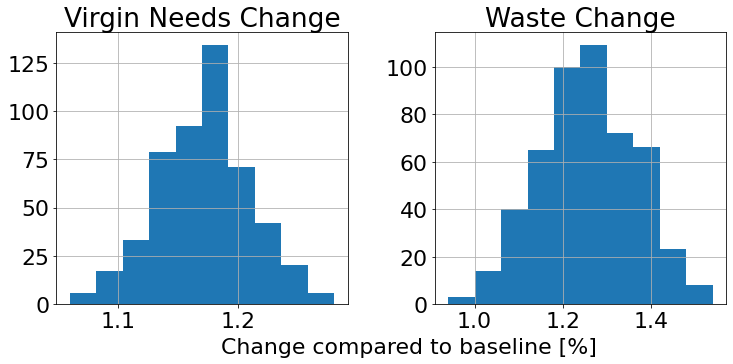

In [57]:
df.hist()
plt.text(0.85, -20.5, 'Change compared to baseline [%]', ha='center');
